### **Importing Libraries**

In [1]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

data = pd.read_csv("adverts.csv")
data.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,2.020060e+14,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,2.020070e+14,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,2.020070e+14,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,2.020070e+14,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,2.020070e+14,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


### **Data | Domain Understanding and Exploration**

In [2]:
# 1. Sample Observations
print("Sample Observations:")
data.head()

Sample Observations:


,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,2.020060e+14,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,2.020070e+14,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,2.020070e+14,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,2.020070e+14,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,2.020070e+14,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [3]:
# 2. Check data parsing
print("Data Information:\n")
data.info()

Data Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  float64
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(3), int64(1), object(7)
memory usage: 34.1+ MB


In [4]:
print("Check for missing values:")
data.isnull().sum()

Check for missing values:


public_reference             0
mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

In [5]:
# 3. Identify Quantitative and Qualitative Features
quantitative_features = data.select_dtypes(include=[np.number]).columns.tolist()
qualitative_features = data.select_dtypes(include=["object"]).columns.tolist()

print("\nQuantitative Features:", quantitative_features)
print("Qualitative Features:", qualitative_features)


Quantitative Features: ['public_reference', 'mileage', 'year_of_registration', 'price']
Qualitative Features: ['reg_code', 'standard_colour', 'standard_make', 'standard_model', 'vehicle_condition', 'body_type', 'fuel_type']


In [6]:
# 4. Analyze Data Distribution
print("\nSummary Statistics for Quantitative Features:")
data[quantitative_features].describe()


Summary Statistics for Quantitative Features:


,public_reference,mileage,year_of_registration,price
count,4.020050e+05,401878.000000,368694.000000,4.020050e+05
mean,2.020069e+14,37743.595656,2015.006206,1.734197e+04
std,1.691466e+10,34831.724018,7.962667,4.643746e+04
min,2.013070e+14,0.000000,999.000000,1.200000e+02
25%,2.020090e+14,10481.000000,2013.000000,7.495000e+03
50%,2.020090e+14,28629.500000,2016.000000,1.260000e+04
75%,2.020100e+14,56875.750000,2018.000000,2.000000e+04
max,2.020110e+14,999999.000000,2020.000000,9.999999e+06


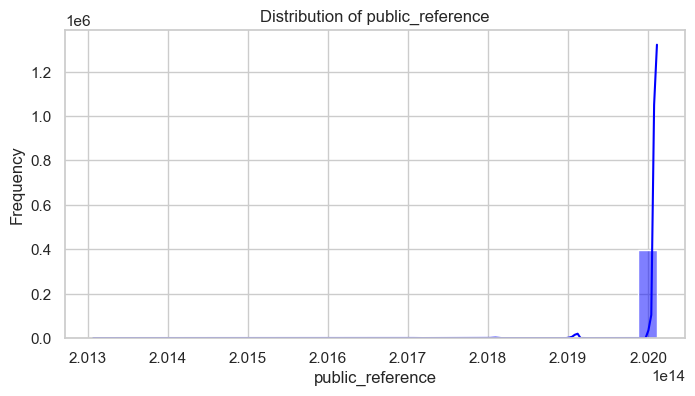

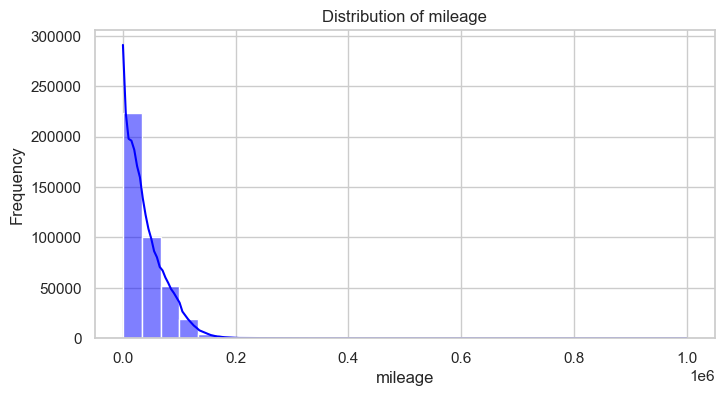

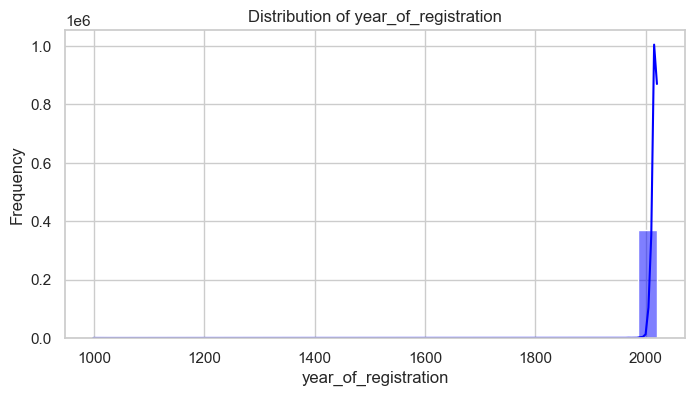

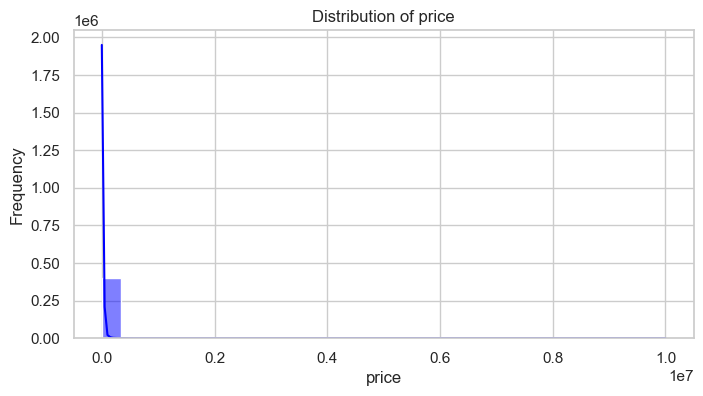

In [7]:
# Distribution plots for quantitative features
for col in quantitative_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col].dropna(), kde=True, bins=30, color="blue")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

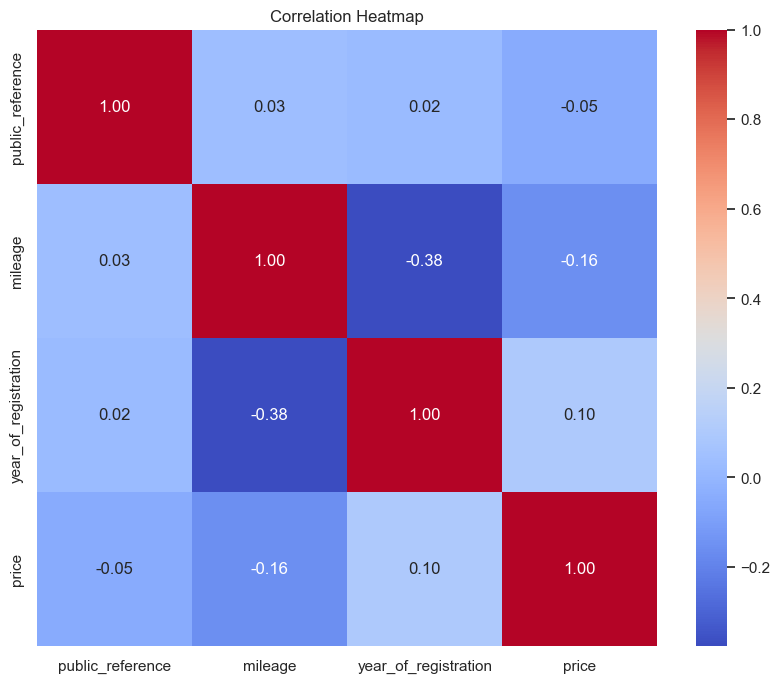

In [8]:
# 5. Identify Potential Predictors
# Correlation heatmap for quantitative features
plt.figure(figsize=(10, 8))
correlation_matrix = data[quantitative_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [9]:
# Checking unique values in qualitative features
for col in qualitative_features:
    print(f"\nUnique values in {col}:")
    print(data[col].unique())


Unique values in reg_code:
[nan '61' '17' '16' '64' '13' '8' '19' '60' '69' '66' '12' '18' '65' '9'
 'B' '10' '14' '3' '67' '63' '15' '68' '56' '20' '70' '62' '11' '5' '59'
 '58' 'W' '2' '57' '6' '52' '53' '4' 'J' '7' '55' '51' 'X' 'D' 'S' 'Y'
 '54' 'H' 'K' 'E' 'L' 'V' 'M' 'G' 'T' 'N' 'P' 'A' 'F' 'R' 'C' '94' '85'
 'CA' 'm' 'FW' '723xuu' '95' 's' '38' 'k' '37' 'p']

Unique values in standard_colour:
['Grey' 'Blue' 'Brown' 'Red' 'Bronze' 'Black' 'White' 'Silver' nan
 'Purple' 'Green' 'Orange' 'Yellow' 'Turquoise' 'Gold' 'Multicolour'
 'Beige' 'Burgundy' 'Pink' 'Maroon' 'Magenta' 'Navy' 'Indigo']

Unique values in standard_make:
['Volvo' 'Jaguar' 'SKODA' 'Vauxhall' 'Land Rover' 'Audi' 'Mercedes-Benz'
 'Volkswagen' 'Peugeot' 'SEAT' 'MINI' 'BMW' 'Nissan' 'Mitsubishi'
 'Ferrari' 'Citroen' 'Toyota' 'Kia' 'Renault' 'Fiat' 'Honda' 'Bentley'
 'DS AUTOMOBILES' 'Hyundai' 'Aston Martin' 'McLaren' 'Smart' 'Alfa Romeo'
 'Porsche' 'Abarth' 'Mazda' 'Suzuki' 'MG' 'Dacia' 'Subaru' 'SsangYong'
 'Maserat

In [10]:
# 6. Process the Data for Visualization and Exploration
data_cleaned = data.dropna()
data_cleaned.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
1,2.020070e+14,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,2.020070e+14,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,2.020070e+14,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,2.020070e+14,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel
5,2.020090e+14,16000.0,17,Blue,Audi,S5,USED,2017.0,29000,Convertible,False,Petrol


### **Data Processing for Machine Learning**

In [11]:
# 1. Detect and Deal with Noise
# Example: Remove rows with unrealistic 'mileage' (e.g., negative or abnormally high values)
mileage_threshold = 500000  # Define a reasonable threshold for mileage
data_cleaned = data_cleaned[data_cleaned['mileage'].between(0, mileage_threshold)]

print("\nData after handling noise:")
data_cleaned.describe()


Data after handling noise:


,public_reference,mileage,year_of_registration,price
count,3.634170e+05,363417.000000,363417.000000,3.634170e+05
mean,2.020072e+14,40926.378455,2015.038229,1.558589e+04
std,1.637299e+10,34147.244648,7.939213,2.223389e+04
min,2.013070e+14,0.000000,999.000000,1.200000e+02
25%,2.020090e+14,14568.000000,2013.000000,6.999000e+03
50%,2.020100e+14,31924.000000,2016.000000,1.180000e+04
75%,2.020100e+14,60000.000000,2018.000000,1.849500e+04
max,2.020110e+14,413079.000000,2020.000000,2.850000e+06


In [12]:
# 2. Handle Missing Values
# Check again for any missing values
missing_values = data_cleaned.isnull().sum()
print("\nMissing values after noise handling:")
missing_values


Missing values after noise handling:


public_reference         0
mileage                  0
reg_code                 0
standard_colour          0
standard_make            0
standard_model           0
vehicle_condition        0
year_of_registration     0
price                    0
body_type                0
crossover_car_and_van    0
fuel_type                0
dtype: int64

In [13]:
# 3. Detect and Handle Outliers
# Example: Use IQR to detect and remove outliers for numerical features
def remove_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

for col in ['mileage', 'price', 'year_of_registration']:
    if col in data_cleaned.columns:
        data_cleaned = remove_outliers(data_cleaned, col)

print("\nData after handling outliers:")
data_cleaned.describe()


Data after handling outliers:


,public_reference,mileage,year_of_registration,price
count,3.266700e+05,326670.000000,326670.000000,326670.000000
mean,2.020076e+14,38955.627447,2015.468289,12939.083436
std,1.372198e+10,29677.782338,3.309149,7493.748276
min,2.013070e+14,0.000000,2006.000000,200.000000
25%,2.020090e+14,15202.000000,2014.000000,7295.000000
50%,2.020100e+14,31800.000000,2016.000000,11500.000000
75%,2.020100e+14,57452.750000,2018.000000,17299.000000
max,2.020110e+14,128145.000000,2020.000000,35544.000000


In [14]:
# 4. Subset, Reshape, and Engineer Features
# Example: Engineer a new feature 'vehicle_age' from 'year_of_registration'
current_year = 2024
data_cleaned['vehicle_age'] = current_year - data_cleaned['year_of_registration']

# Drop columns not useful for Machine Learning (e.g., public_reference)
columns_to_drop = ['public_reference', 'standard_make', 'standard_model', 'reg_code']
data_cleaned.drop(columns=columns_to_drop, inplace=True, errors='ignore')

print("\nData after feature engineering:")
data_cleaned.head()


Data after feature engineering:


,mileage,standard_colour,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,vehicle_age
1,108230.0,Blue,USED,2011.0,7000,Saloon,False,Diesel,13.0
2,7800.0,Grey,USED,2017.0,14000,SUV,False,Petrol,7.0
3,45000.0,Brown,USED,2016.0,7995,Hatchback,False,Diesel,8.0
4,64000.0,Grey,USED,2015.0,26995,SUV,False,Diesel,9.0
5,16000.0,Blue,USED,2017.0,29000,Convertible,False,Petrol,7.0


In [15]:
# 5. Rescale Data
scaler = StandardScaler()
numerical_features = ['mileage', 'price', 'vehicle_age']  # Specify numerical features
data_cleaned[numerical_features] = scaler.fit_transform(data_cleaned[numerical_features])

print("\nData after scaling:")
data_cleaned[numerical_features].head()


Data after scaling:


,mileage,price,vehicle_age
1,2.334220,-0.792540,1.350285
2,-1.049798,0.141574,-0.462872
3,0.203667,-0.659762,-0.160679
4,0.843877,1.875689,0.141514
5,-0.773497,2.143245,-0.462872


In [16]:
# 6. Split Data into Predictors and Target
# Specify the target variable
target = 'price'  # Replace 'price' with your target variable
predictors = data_cleaned.drop(columns=[target])
target_values = data_cleaned[target]

# 7. Obtain Train | Validation | Folds
X_train, X_temp, y_train, y_temp = train_test_split(predictors, target_values, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("\nTraining, Validation, and Test Set Sizes:")
print(f"Train: {X_train.shape}, Validation: {X_val.shape}, Test: {X_test.shape}")


Training, Validation, and Test Set Sizes:
Train: (228669, 8), Validation: (49000, 8), Test: (49001, 8)


### **Model Building**

In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

In [18]:
# Identify categorical and numerical features
categorical_features = X_train.select_dtypes(include=["object"]).columns
numerical_features = X_train.select_dtypes(include=["number"]).columns

# Define preprocessing pipelines
categorical_pipeline = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

numerical_pipeline = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="mean")),
    ("scale", StandardScaler())
])

# Combine preprocessors
preprocessor = ColumnTransformer(transformers=[
    ("num", numerical_pipeline, numerical_features),
    ("cat", categorical_pipeline, categorical_features)
])

# Define models and hyperparameters
models = {
    "Linear Regression": {
        "model": Pipeline(steps=[("preprocessor", preprocessor), ("regressor", LinearRegression())]),
        "params": {}
    },
    "Decision Tree": {
        "model": Pipeline(steps=[("preprocessor", preprocessor), ("regressor", DecisionTreeRegressor(random_state=42))]),
        "params": {
            "regressor__max_depth": [None, 10, 20],
            "regressor__min_samples_split": [2, 5, 10]
        }
    },
    "Linear Support Vector Regressor": {
        "model": Pipeline(steps=[("preprocessor", preprocessor), ("regressor", LinearSVR())]),
        "params": {
            "regressor__C": [0.1, 1, 10],
            "regressor__epsilon": [0.01, 0.1, 0.2]
        }
    }
}

# Initialize an empty DataFrame to store results
results = pd.DataFrame(columns=["Model", "Best Params", "Train RMSE", "Validation RMSE", "R2 Score"])


In [19]:
# Fit and tune each model
for model_name, config in models.items():
    print(f"\nTuning {model_name}...")
    grid_search = GridSearchCV(estimator=config["model"], param_grid=config["params"], cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Best model and parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Predictions
    train_preds = best_model.predict(X_train)
    val_preds = best_model.predict(X_val)

    # Metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
    val_rmse = np.sqrt(mean_squared_error(y_val, val_preds))
    r2 = r2_score(y_val, val_preds)

    # Save results
    results = pd.concat([
        results,
        pd.DataFrame([[model_name, best_params, train_rmse, val_rmse, r2]], columns=results.columns)
    ], ignore_index=True)



Tuning Linear Regression...


C:\Users\garda\AppData\Local\Temp\ipykernel_14904\71714440.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([



Tuning Decision Tree...

Tuning Linear Support Vector Regressor...


c:\Users\garda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [20]:
# Evaluate and rank models
print("\nModel Performance Summary:")
results.sort_values(by="Validation RMSE", ascending=True)


Model Performance Summary:


,Model,Best Params,Train RMSE,Validation RMSE,R2 Score
1,Decision Tree,"{'regressor__max_depth': 10, 'regressor__min_s...",0.601666,0.610673,0.626654
0,Linear Regression,{},0.653346,0.653751,0.572123
2,Linear Support Vector Regressor,"{'regressor__C': 1, 'regressor__epsilon': 0.2}",0.666309,0.666338,0.555488


In [21]:
# Save the best model
best_model_name = results.sort_values(by="Validation RMSE").iloc[0]["Model"]
print(f"\nBest Model: {best_model_name}")
final_model = models[best_model_name]["model"].set_params(**results.loc[results["Model"] == best_model_name, "Best Params"].values[0])
final_model.fit(X_train, y_train)


Best Model: Decision Tree


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['mileage', 'year_of_registration', 'vehicle_age'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['standard_colour', 'vehicle_condition', 'body_type', 'fuel_type'], dtype='object'))])),
                ('regressor',
                 DecisionTreeRegressor(max_depth=10, min_samples_split=10,
                                       random_state=42))])

### **Model Evaluation and Analysis**

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

In [23]:
# Cross-validation evaluation
cross_val_scores = cross_val_score(final_model, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
cross_val_rmse = np.sqrt(-cross_val_scores)  # Since scoring is neg_mean_squared_error
print(f"Cross-Validation RMSE (5 folds): {cross_val_rmse}")
print(f"Mean Cross-Validation RMSE: {cross_val_rmse.mean():.3f} ± {cross_val_rmse.std():.3f}")


Cross-Validation RMSE (5 folds): [0.61074891 0.6087384  0.60997855 0.60907963 0.6158301 ]
Mean Cross-Validation RMSE: 0.611 ± 0.003


In [24]:
# Predictions on train and validation data
train_preds = final_model.predict(X_train)
val_preds = final_model.predict(X_val)

# Calculate additional evaluation metrics
train_mae = mean_absolute_error(y_train, train_preds)
val_mae = mean_absolute_error(y_val, val_preds)
train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
val_rmse = np.sqrt(mean_squared_error(y_val, val_preds))
train_r2 = r2_score(y_train, train_preds)
val_r2 = r2_score(y_val, val_preds)

# Print the evaluation metrics
print(f"\nTraining RMSE: {train_rmse:.3f}, MAE: {train_mae:.3f}, R²: {train_r2:.3f}")
print(f"Validation RMSE: {val_rmse:.3f}, MAE: {val_mae:.3f}, R²: {val_r2:.3f}")



Training RMSE: 0.602, MAE: 0.435, R²: 0.637
Validation RMSE: 0.611, MAE: 0.441, R²: 0.627


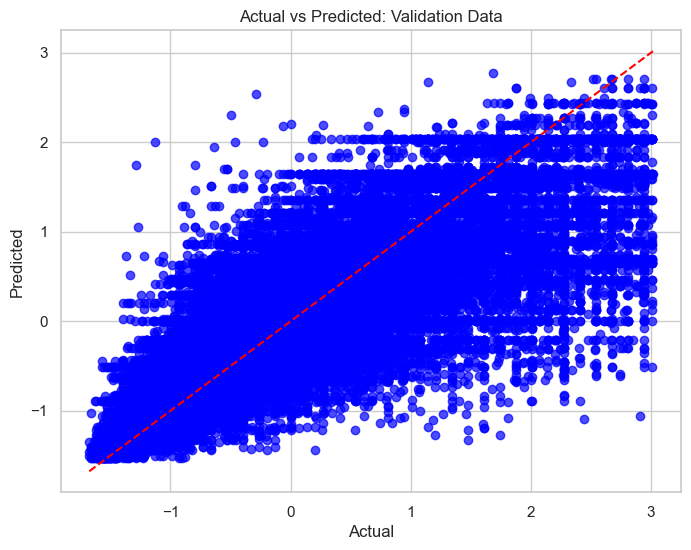

In [25]:
# Actual vs Predicted Plot (for Validation Data)
plt.figure(figsize=(8, 6))
plt.scatter(y_val, val_preds, color="blue", alpha=0.7)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color="red", linestyle="--")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted: Validation Data")
plt.grid(True)
plt.show()

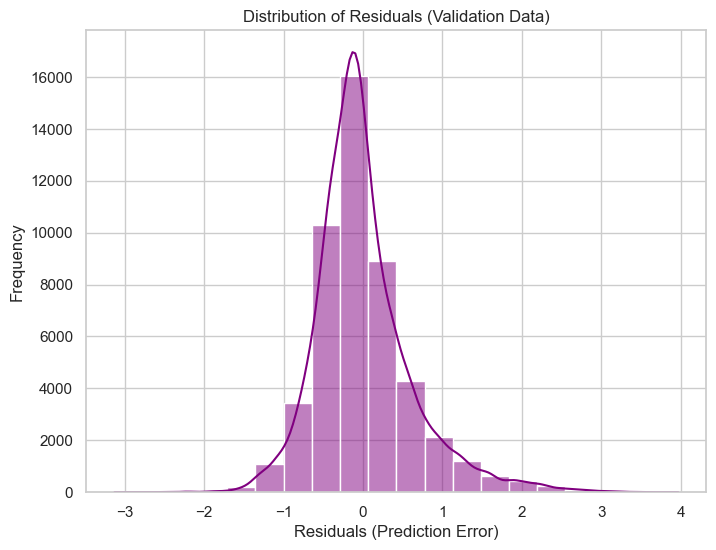

In [26]:
# Residuals (Prediction Errors) Plot for Validation Data
residuals = y_val - val_preds
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color="purple", bins=20)
plt.title("Distribution of Residuals (Validation Data)")
plt.xlabel("Residuals (Prediction Error)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


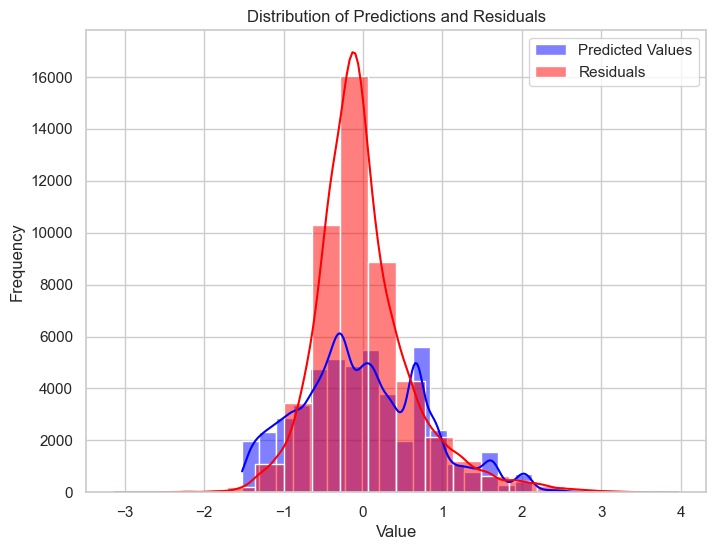

In [27]:
# Analyze Distribution of Scores (Predictions) and Losses (Errors)
plt.figure(figsize=(8, 6))
sns.histplot(val_preds, kde=True, color="blue", bins=20, label="Predicted Values")
sns.histplot(residuals, kde=True, color="red", bins=20, label="Residuals")
plt.title("Distribution of Predictions and Residuals")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


### **Model Interpretation**

c:\Users\garda\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


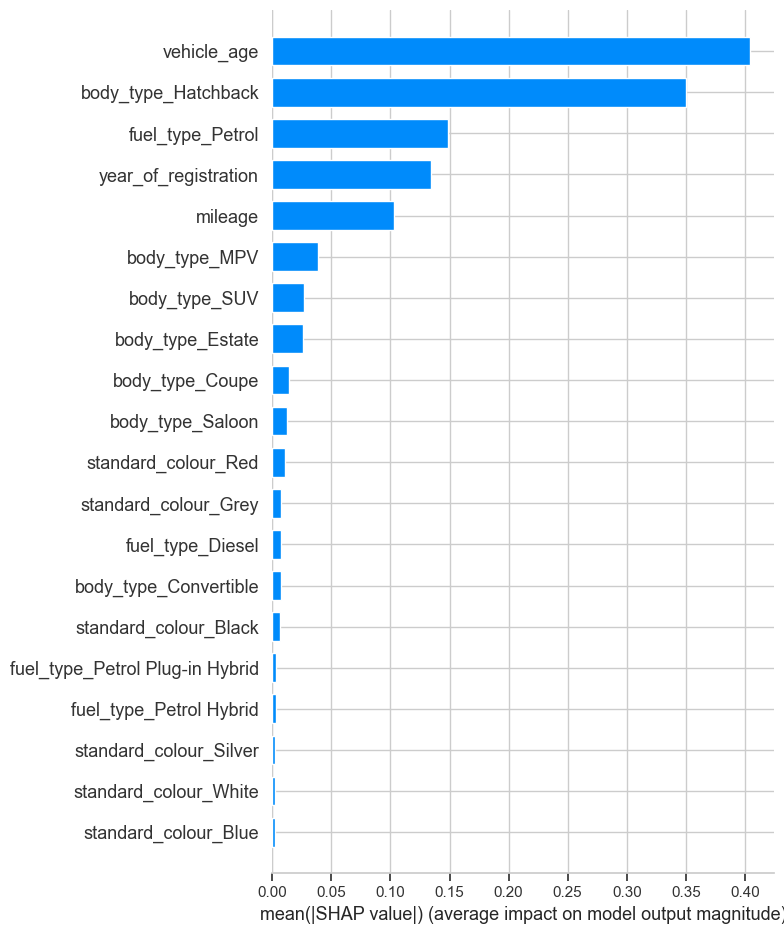

In [28]:
import shap

# Preprocess the validation data (ensure it's numeric)
X_val_preprocessed = final_model.named_steps["preprocessor"].transform(X_val)

# If the result is a sparse matrix, convert it to a dense numpy array
if not isinstance(X_val_preprocessed, np.ndarray):
    X_val_preprocessed = X_val_preprocessed.toarray()

# Ensure the data is numeric, explicitly cast to float
X_val_preprocessed = X_val_preprocessed.astype(np.float32)

# Retrieve feature names from the preprocessing pipeline
categorical_features = X_train.select_dtypes(include=["object"]).columns
numerical_features = X_train.select_dtypes(include=["number"]).columns

# Get feature names after one-hot encoding
categorical_feature_names = final_model.named_steps["preprocessor"] \
    .named_transformers_["cat"] \
    .named_steps["onehot"] \
    .get_feature_names_out(categorical_features)

# Combine numerical and categorical feature names
all_feature_names = list(numerical_features) + list(categorical_feature_names)

# Initialize the SHAP explainer for the decision tree model (best model)
explainer = shap.TreeExplainer(final_model.named_steps["regressor"])

# Calculate SHAP values for the processed validation set
shap_values = explainer.shap_values(X_val_preprocessed)

# Convert preprocessed validation data to a DataFrame for readability
X_val_preprocessed_df = pd.DataFrame(X_val_preprocessed, columns=all_feature_names)

# Plot the SHAP summary plot to see feature importance
shap.summary_plot(shap_values, X_val_preprocessed_df, plot_type="bar", show=True)
